---

# Mastère Spécialisé Expert en Science des données

---
## MACHINE LEARNING 2
---

*Auteur :* Paquarse Mahouvi

*Date:* 25-12-2023
---

# Partie 2 : Régression logistique
# Prise en main
## Importation des packages de base et definition des fonctions d'affichage 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import linear_model
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
plt.close("all")
def plot_regions_decision_2d(X, y, classifier, resolution=0.02, titre=' '):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0, X[:, 0].max() + 0
    x2_min, x2_max = X[:, 1].min() - 0, X[:, 1].max() + 0
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure()
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.6, c=cmap(idx),
                    marker=markers[idx], label= 'classe {}'.format(cl))
    plt.legend(loc='best')
    plt.title(titre, fontsize=12)

## 1.1. Importation des données

Les données d'Iris comprennent des mesures de quatre caractéristiques (variables) de 150 échantillons de fleurs d'iris provenant de trois espèces différentes. Les quatre caractéristiques mesurées sont les suivantes :
- Longueur du sépale (en centimètres)
- Largeur du sépale (en centimètres)
- Longueur du pétale (en centimètres)
- Largeur du pétale (en centimètres)

Les trois espèces d'iris incluses dans l'ensemble de données sont :
- Iris setosa
- Iris versicolor
- Iris virginica

Chaque espèce est représentée par 50 échantillons. Ainsi, l'ensemble de données d'Iris comporte un total de 150 échantillons (3 espèces x 50 échantillons par espèce).

In [8]:
iris = datasets.load_iris()
X, Y = iris.data, iris.target

## 1.2. Préparation des données
Nous avons séparé la base de données en deux, une contenant les régresseurs X (nommé )et l'autre la variable cible nommé Y. L'étape suivante est la normalisation des données. Elle vise à mettre toutes les variables d'entrée sur une échelle commune, généralement en les ramenant à une moyenne nulle et à une variance unitaire. Avant de réaliser cette normalisation, nous séparerons nos données en deux classes. Une classe d'apprentissage contenant 2/3 des données et une classe de valisation contenant 1/3 des donnnées. Ce choix n'est pas exactement celui qui a été fait dans le  cours. Toutefois, après plusieurs tentatives, on a remarqué qui permet notamment d'améliorer les capacités prédictive de notre modèle, étant donnée qu'il lui permet d'apprendre sur un nombre plus conséquent de données. 

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=True, with_std=True)

In [11]:
Xa, Xv, Ya, Yv = train_test_split(X, Y, shuffle=True, test_size=1/3, stratify=Y)

In [13]:
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xv = sc.transform(Xv)

In [27]:
print("\nCaractéristiques jeu apprentissage : ")
print("Nombre d'iris : ", Xa.shape[0] )
print("Nombre de classe d'iris : ", len(np.unique(Ya)))

print("\nCaractéristiques jeu validation : ")
print("Nombre d'iris : ", Xv.shape[0] )
print("Nombre de classe d'iris : ", len(np.unique(Yv)))


Caractéristiques jeu apprentissage : 
Nombre d'iris :  100
Nombre de classe d'iris :  3

Caractéristiques jeu validation : 
Nombre d'iris :  50
Nombre de classe d'iris :  3


## 1.3. Mise en place de la régression logistique

La régression logistique est implémentée dans LogisticRegression. Sa mise en place nécéssite le choix d'un certain nombre d'hyperparamaètre comme la tolérance et plus encore le choix de la variable **C**. La variable C représente l'inverse de la force de régularisation ; doit être un nombre flottant positif. Comme dans les machines à vecteurs de support, des valeurs plus petites indiquent une régularisation plus forte. Il sera donc question, de choisir à un ensemble de valeurs assez différente de C afin de choisir la bonne à partir des erreurs.

In [42]:
### Selection de l'hyper-parametre C 
clf_reglog = linear_model.LogisticRegression(tol=1e-5, multi_class='multinomial', solver='lbfgs')
### Vecteur des possibles de C
vectC = np.logspace(-3, 2, 20)
### Erreur aléatoire à changer par les bonnes valeurs
err_app = np.empty(vectC.shape[0])
err_val = np.empty(vectC.shape[0])
for ind_C, C in enumerate(vectC):
    clf_reglog.C = C
    clf_reglog.fit(Xa, Ya)
    # Calcul des erreurs apprentissage et de test
    err_val[ind_C] = 1 - accuracy_score(Yv, clf_reglog.predict(Xv))
    err_app[ind_C] = 1 - accuracy_score(Ya, clf_reglog.predict(Xa))

In [43]:
# Choix du meilleur C
err_min_val, ind_min = err_val.min(), err_val.argmin()
Copt = vectC[ind_min]

Nous avons modifié légèrement le code d'affichage des erreurs afin de permettre d'observer directement le C optimal sur la figure.

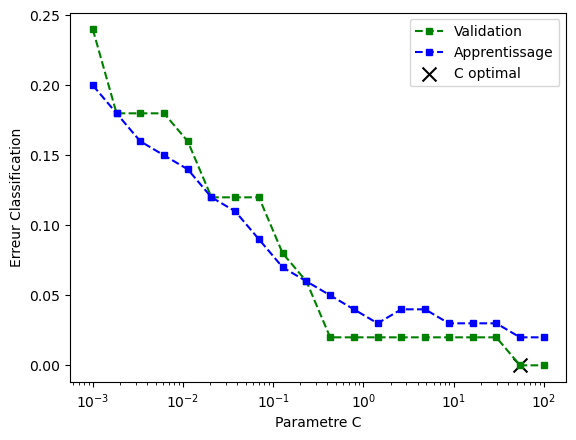

In [47]:
#%% #### Trace des courbes d'erreur d'apprentissage
plt.figure()
plt.semilogx(vectC, err_val, color='green', linestyle='--', marker='s', markersize=5, label='Validation')
plt.semilogx(vectC, err_app, color='blue', linestyle='--', marker='s', markersize=5, label='Apprentissage')
plt.xlabel('Parametre C')
plt.ylabel('Erreur Classification')
plt.legend(loc='best')
plt.scatter(Copt, err_min_val, color='black', marker='x', s=100, label='C optimal')
plt.legend()
plt.show()

Une fois le paramètre optimal choisi, nous allons ré-entrainer de nouveau notre modèle avec les bonnes valeurs des paramètres afin de pouvoir calculer les erreurs du modèle.

In [51]:
# Model final
clf_reglog.C = Copt
clf_reglog.fit(Xa, Ya)
print('Valeur de Copt = {}'.format(Copt ))
print('Erreur validation correspondante = {}'.format(100*(1 - accuracy_score(Yv, clf_reglog.predict(Xv)))))
print('Erreur apprentissage correspondante = {}'.format(100*(1 - accuracy_score(Ya, clf_reglog.predict(Xa)))))

Valeur de Copt = 54.555947811685144
Erreur validation correspondante = 0.0
Erreur apprentissage correspondante = 2.0000000000000018


Nous pouvons remarquer pour une valeur de C optimal de 54,55, nous avons un taux d'erreur nul pour l'échantillon de validation et un taux très faible (2%) pour l'erreur d'apprentissage. Cela témoigne de la qualité de notre modèle à bien prévoir le type d'iris à partir des mesures de la longueur et de la largeur des sépales et des pétales.

## Visualisation de la frontière de décisions

Afin d'observer les frontières de décision, nous avons opté aléatoirement pour deux variables de notre base de données afin permettre l'affichage

C:\Users\Paqua\AppData\Local\Temp\ipykernel_87408\1780954061.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


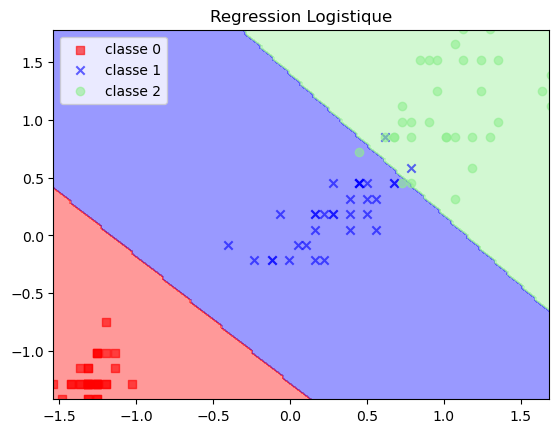

In [52]:
variables = [2, 3]
## on re-apprend le modele avec Coptimal 
clf_reglog.C = Copt
clf_reglog.fit(Xa[:,variables], Ya) 
plot_regions_decision_2d(Xa[:,variables], Ya, clf_reglog, 0.02, titre='{}'.format("Regression Logistique"))

## Calcul des probabilités 

Il est question de calculer les probabilités a posteriori des classes et en déduire la prédiction, au sens du maximum de probabilité a posteriori, de la classe des points de validation. Pour ce faire, nous ré-entrainons notre modèles avec toutes les variables et le C optimal 

In [54]:
clf_reglog = linear_model.LogisticRegression(tol=1e-5, multi_class='multinomial', solver='lbfgs', C=Copt)
clf_reglog.fit(Xa, Ya)

LogisticRegression(C=54.555947811685144, multi_class='multinomial', tol=1e-05)

In [56]:
proba = clf_reglog.predict_proba(Xv)
ypredv = np.argmax(proba, axis=1)
print("Err val = {}".format(100*(1-accuracy_score(Yv, ypredv))))

Err val = 0.0


Nous pouvons observer que l'erreur de validation est de 0. Pour en savoir plus, nous affichons la matrice de confusion

Text(0, 0.5, 'Vrai label')

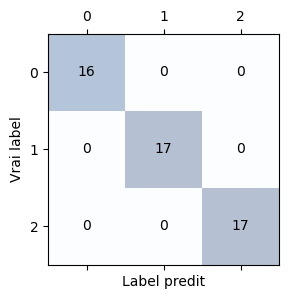

In [64]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=Yv, y_pred=ypredv)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va="center", ha="center")
plt.xlabel("Label predit")
plt.ylabel("Vrai label")

# 2.2 Régression logistique sur problème de classification binaire

## 1. Chargement des données

In [122]:
df = pd.read_csv("./CTGSimple.csv", sep="\t",header=1)
Y = df["NSP"].values
variables = ["LB","AC.1","FM.1","UC.1","DL.1","DS.1","DP.1","ASTV",
"MSTV","ALTV","MLTV", "Width","Min","Max","Nmax", "Nzeros","Mode","Mean","Median","Variance","Tendency"]
X = df[variables].values
df.shape

(2126, 42)

Nous base de données contient 2126 observations et 42 variables. La variable cible quant à elle, contient 3 classes différentes. Dans le but de se ramener à une problématique de classification binaire, la classe 3 sera recoder en classe 2.

In [123]:
classe = 3
Y[np.in1d(Y, classe)] = 2

In [124]:
Data = pd.DataFrame({"Classe": Y})
effectifs = Data['Classe'].value_counts().reset_index()
effectifs

,Classe,count
0,1,1655
1,2,471


On peut voir que la classe 1 contient 1655 données et la classe 2 contient 471 observations.

## Découpage des données : 
Ici, nous découpons les données ainsi obtenues en 3 parties : apprentissage, validation et test. Quant aux proportitons, nous avons opté pour :
-  Apprentissage : 60%
-  Validation : 20%
-  Test : 20%

In [125]:
# decoupage des donnees initiales en app et test (proportion a choisir)
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=0.2, stratify=Y)
# les donnees app sont ensuite re-decoupees en app et validation (proportion au choix)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size = 0.2 / (1 - 0.2), stratify=Ya)

In [126]:
print("La taille des échantillons : ")
Xa.shape, Xv.shape, Xt.shape

La taille des échantillons : 


((1275, 21), (425, 21), (426, 21))

## Normalisation des données 

In [127]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xv = sc.transform(Xv)
Xt = sc.transform(Xt)

Mise en oeuvre la méthode de régression logistique. Il faudra notamment choisir le paramètre de régularisation C

In [128]:
### Selection de l'hyper-parametre C 
clf_reglog = linear_model.LogisticRegression(tol=1e-5, multi_class='multinomial', solver='lbfgs')
### Vecteur des possibles de C
vectC = np.logspace(-3, 2, 100)
### Erreur aléatoire à changer par les bonnes valeurs
err_app = np.empty(vectC.shape[0])
err_val = np.empty(vectC.shape[0])
for ind_C, C in enumerate(vectC):
    clf_reglog.C = C
    clf_reglog.fit(Xa, Ya)
    # Calcul des erreurs apprentissage et de test
    err_val[ind_C] = 1 - accuracy_score(Yv, clf_reglog.predict(Xv))
    err_app[ind_C] = 1 - accuracy_score(Ya, clf_reglog.predict(Xa))

In [129]:
# Choix du meilleur C
err_min_val, ind_min = err_val.min(), err_val.argmin()
Copt = vectC[ind_min]

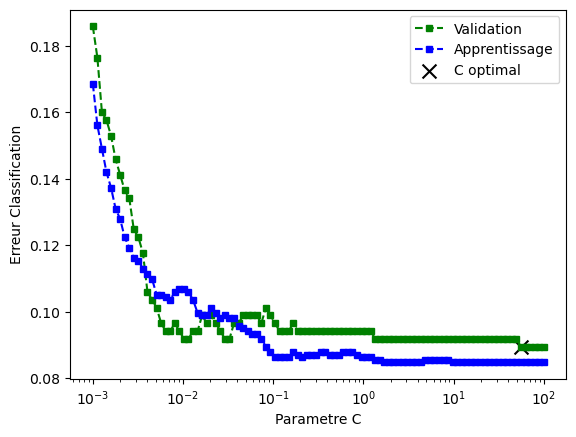

In [131]:
#%% #### Trace des courbes d'erreur d'apprentissage
plt.figure()
plt.semilogx(vectC, err_val, color='green', linestyle='--', marker='s', markersize=5, label='Validation')
plt.semilogx(vectC, err_app, color='blue', linestyle='--', marker='s', markersize=5, label='Apprentissage')
plt.xlabel('Parametre C')
plt.ylabel('Erreur Classification')
plt.legend(loc='best')
plt.scatter(Copt, err_min_val, color='black', marker='x', s=100, label='C optimal')
plt.legend()
plt.show()

## Modèle final et calcul des erreurs sur l'apprentissage et la validation 

In [132]:
# Model final
clf_reglog.C = Copt
clf_reglog.fit(Xa, Ya)
print('Valeur de Copt = {}'.format(Copt ))
print('Erreur validation correspondante = {}'.format(100*(1 - accuracy_score(Yv, clf_reglog.predict(Xv)))))
print('Erreur apprentissage correspondante = {}'.format(100*(1 - accuracy_score(Ya, clf_reglog.predict(Xa)))))

Valeur de Copt = 55.90810182512222
Erreur validation correspondante = 8.94117647058823
Erreur apprentissage correspondante = 8.47058823529412


## Comparaison avec la LDA

Dans le but de comparer les deux modèles, on utilisera le modèle de test.

- Mise en place de la LDA et la régression logistique sur les données test

In [141]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_lda = LinearDiscriminantAnalysis(solver='svd', store_covariance = True)
clf_lda.fit(Xa, Ya)
Yt_lda = clf_lda.predict(Xt)
print("LINEAR DISCRIMINANT ANALYSE : ")
print("LDA TEST ERROR = ", (sum(Yt_lda != Yt)/Yt.size*100))
print("LOGISTIQUE ")
print('LOGISTIQUE TEST ERROR = {}'.format(100*(1 - accuracy_score(Yt, clf_reglog.predict(Xt)))))

LINEAR DISCRIMINANT ANALYSE : 
LDA TEST ERROR =  8.215962441314554
LOGISTIQUE 
LOGISTIQUE TEST ERROR = 8.21596244131455


De l'analyse des erreurs sur l'échantillon de test pour les modèles logistique et lda, nous pouvons voir que sur cet échantillon, les deux modèles ont les mêmes performances.

## Matrice de confusion sur les données tests

In [11]:
from sklearn.metrics import confusion_matrix

- Modèle logistic

Text(0, 0.5, 'Vrai label')

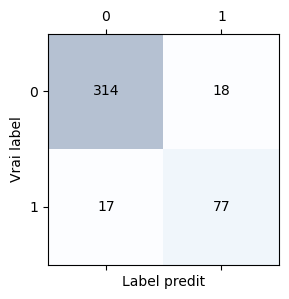

In [144]:
log_y_pred = clf_reglog.predict(Xt)
confmat = confusion_matrix(y_true=Yt, y_pred=log_y_pred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va="center", ha="center")
plt.xlabel("Label predit")
plt.ylabel("Vrai label")

-   LDA

Text(0, 0.5, 'Vrai label')

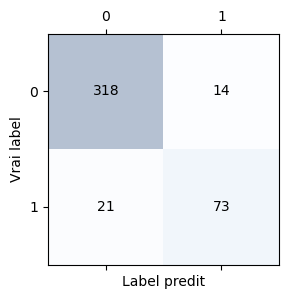

In [145]:
confmat_lda = confusion_matrix(y_true=Yt, y_pred=Yt_lda)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat_lda, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat_lda.shape[0]):
    for j in range(confmat_lda.shape[1]):
        ax.text(x=j, y=i, s=confmat_lda[i, j], va="center", ha="center")
plt.xlabel("Label predit")
plt.ylabel("Vrai label")

En affichant les matrices de confusion, on remarque que, la régression logistique et la régression linéaire classe 35 iris dans les mauvaises classes

# Cas multi-classe : données Mnist

## Chargement des données

In [7]:
# Instruction ci-dessous est a mettre en en-tete de votre programme
import scipy.io as sio
# Chargement des donnees
digits_app = sio.loadmat("mnist-app.mat")
Xa, Ya = digits_app["Xa"], digits_app["Ya"][:,0]
digits_test = sio.loadmat("mnist-test.mat")
Xt, Yt = digits_test["Xt"], digits_test["Yt"][:,0]

In [8]:
tol = 1e-3
stda = np.std(Xa, 0)
idx_var = np.squeeze(np.where(stda > tol))
Xa = Xa[:, idx_var]
Xt = Xt[:, idx_var]

### Modèle de régression logistique

In [7]:
## Selection de l'hyper-parametre C 
mnist_reglog = linear_model.LogisticRegression(tol=1e-5, multi_class='multinomial', solver='lbfgs')
### Vecteur des possibles de C
vectC = np.logspace(-3, 2, 10)
### Erreur aléatoire à changer par les bonnes valeurs
err_app = np.empty(vectC.shape[0])
err_test = np.empty(vectC.shape[0])
for ind_C, C in enumerate(vectC):
    mnist_reglog.C = C
    mnist_reglog.fit(Xa, Ya)
    # Calcul des erreurs apprentissage et de test
    err_test[ind_C] = 1 - accuracy_score(Yt, mnist_reglog.predict(Xt))
    err_app[ind_C] = 1 - accuracy_score(Ya, mnist_reglog.predict(Xa))

c:\Users\Paqua\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Paqua\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [8]:
# Choix du meilleur C
err_min_val, ind_min = err_test.min(), err_test.argmin()
Copt = vectC[ind_min]
Copt

2.1544346900318843

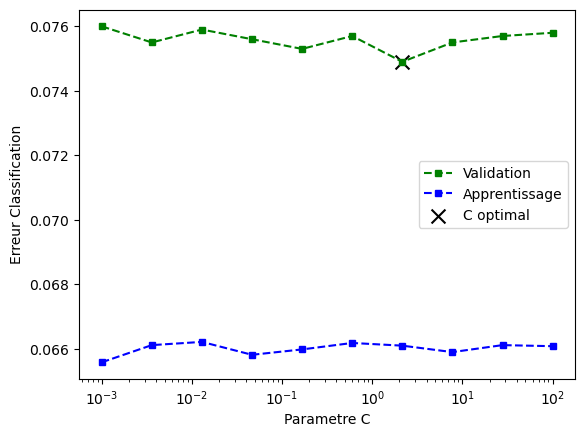

In [9]:
#%% #### Trace des courbes d'erreur d'apprentissage
plt.figure()
plt.semilogx(vectC, err_test, color='green', linestyle='--', marker='s', markersize=5, label='Validation')
plt.semilogx(vectC, err_app, color='blue', linestyle='--', marker='s', markersize=5, label='Apprentissage')
plt.xlabel('Parametre C')
plt.ylabel('Erreur Classification')
plt.legend(loc='best')
plt.scatter(Copt, err_min_val, color='black', marker='x', s=100, label='C optimal')
plt.legend()
plt.show()                         

In [11]:
mnist_reglog.C = Copt
print('Valeur de Copt = {}'.format(Copt ))
print('Erreur test correspondante = {}'.format(100*(1 - accuracy_score(Yt, mnist_reglog.predict(Xt)))))

Valeur de Copt = 2.1544346900318843
Erreur test correspondante = 7.579999999999998


## Comparaison des performances en test avec celles de la LDA
-   LDA sur MNIST

In [16]:
mnist_lda = LinearDiscriminantAnalysis(solver='svd', store_covariance = True)
mnist_lda.fit(Xa, Ya)
Yt_lda_mnist = mnist_lda.predict(Xt)

In [19]:
print("LINEAR DISCRIMINANT ANALYSE SUR MNIST : ")
print("LDA TEST ERROR =", (sum(Yt_lda_mnist != Yt)/Yt.size*100))

LINEAR DISCRIMINANT ANALYSE SUR MNIST : 
LDA TEST ERROR = 12.7


Modèle | Erreur Echantillon test|
-------|------------------------|
LOGISTIQUE | 7.58               |
LDA     |12.7     |


Nous pouvons remarquer que le modèle logistique fait mieux que la LDA

## Des performances qui changent avec un autre solver ?

In [27]:
## Selection de l'hyper-parametre C 
clf_reglog_solver_linear = linear_model.LogisticRegression(tol=1e-2, multi_class="ovr", solver="liblinear")
### Vecteur des possibles de C
vectC = np.logspace(-3, 2, 10)
### Erreur aléatoire à changer par les bonnes valeurs
err_app = np.empty(vectC.shape[0])
err_test = np.empty(vectC.shape[0])
for ind_C, C in enumerate(vectC):
    clf_reglog_solver_linear.C = C
    clf_reglog_solver_linear.fit(Xa, Ya)
    # Calcul des erreurs apprentissage et de test
    err_test[ind_C] = 1 - accuracy_score(Yt, clf_reglog_solver_linear.predict(Xt))
    err_app[ind_C] = 1 - accuracy_score(Ya, clf_reglog_solver_linear.predict(Xa))

In [28]:
# Choix du meilleur C
err_min_val, ind_min = err_test.min(), err_test.argmin()
Copt = vectC[ind_min]
Copt

0.046415888336127795

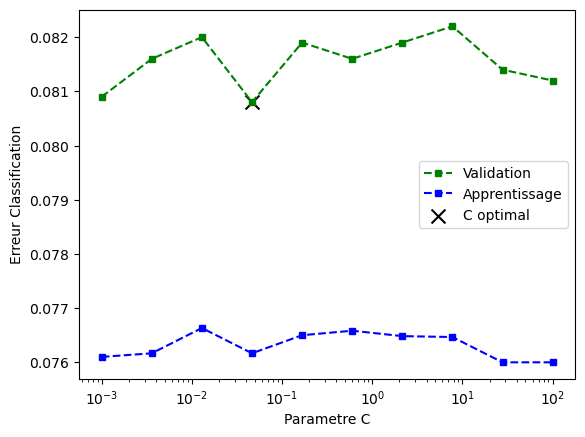

In [29]:
#%% #### Trace des courbes d'erreur d'apprentissage
plt.figure()
plt.semilogx(vectC, err_test, color='green', linestyle='--', marker='s', markersize=5, label='Validation')
plt.semilogx(vectC, err_app, color='blue', linestyle='--', marker='s', markersize=5, label='Apprentissage')
plt.xlabel('Parametre C')
plt.ylabel('Erreur Classification')
plt.legend(loc='best')
plt.scatter(Copt, err_min_val, color='black', marker='x', s=100, label='C optimal')
plt.legend()
plt.show()                         

In [31]:
clf_reglog_solver_linear.C = Copt
print('Valeur de Copt = {}'.format(Copt))
print('Erreur test correspondante = {}'.format(100*(1 - accuracy_score(Yt, clf_reglog_solver_linear.predict(Xt)))))

Valeur de Copt = 0.046415888336127795
Erreur test correspondante = 8.120000000000005


Avec le solver, le modèle prend plus de temps à tourner mais à de faible taux d'erreur avec une tolérance plus grande et moins d'itération. 